# Research Journal

In [2]:
from PIL import Image
DIR_EDA_IMAGES = '/resources/eda/images'

### 2020/02/28:  
Si realizamos una transformación de PCA y transformamos la totalidad de las variables para quedarnos finalmente con 3 componentes principales, vemos que la mayor parte de la clase número 3 (`Pathological`) se distingue del resto, quedando siempre en una esquina (aunque de manera dispersa). Por otro lado, tanto alguno de los casos de la clase 3 como los casos de la clase número 2 (`Suspect`) no se distinguen tan bien de la clase principal. Probamos y tenemos un resultado similar con una transformación de T-SNE (no lineal).

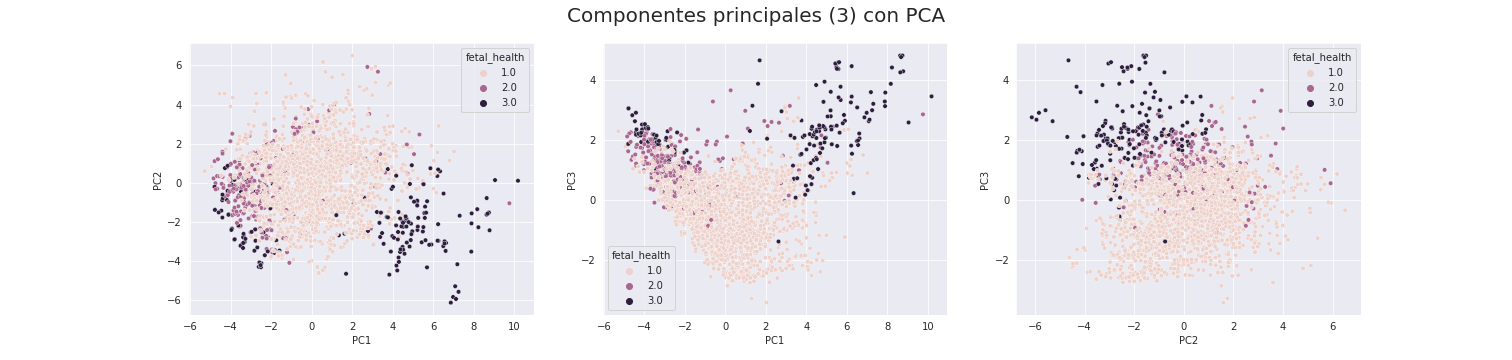

In [9]:
image = Image.open(f'{DIR_EDA_IMAGES}/pca_3components.png')
display(image)


### 2020/02/25:  
As first options we ran the following pipelines  
<pre>1- GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42,shuffle=True),  
estimator=Pipeline(steps=[  
                          ('scalling', StandardScaler()),  
                          ('preprocessing',PCA(n_components=3)),  
                          ('classifier', KNeighborsClassifier())]),    
             param_grid=[{'classifier__n_neighbors': range(2, 20, 2),
                          'classifier__weights': ['uniform', 'distance'],
                          'preprocessing__n_components': range(2, 10, 2),
                          'scalling': [StandardScaler(), MinMaxScaler(),
                                       None]}],
             scoring='f1_weighted')
</pre>
<pre>             
Results:  
              precision    recall  f1-score   support

      Normal       0.97      0.94      0.95       515
Pathological       0.74      0.93      0.82        42
     Suspect       0.67      0.73      0.70        81

    accuracy                           0.91       638
   macro avg       0.79      0.86      0.82       638
weighted avg       0.92      0.91      0.91       638
</pre>

### 2020/02/24:  
Como análisis exploratorio podemos ver que, en lo que respecta a las variables no agrupadas, su distribución no varía sensiblemente para las distintas clases. Sólo podemos ver una pequeña diferencia en la tendencia central de las variables `baseline value` y `uterine_contractions`.

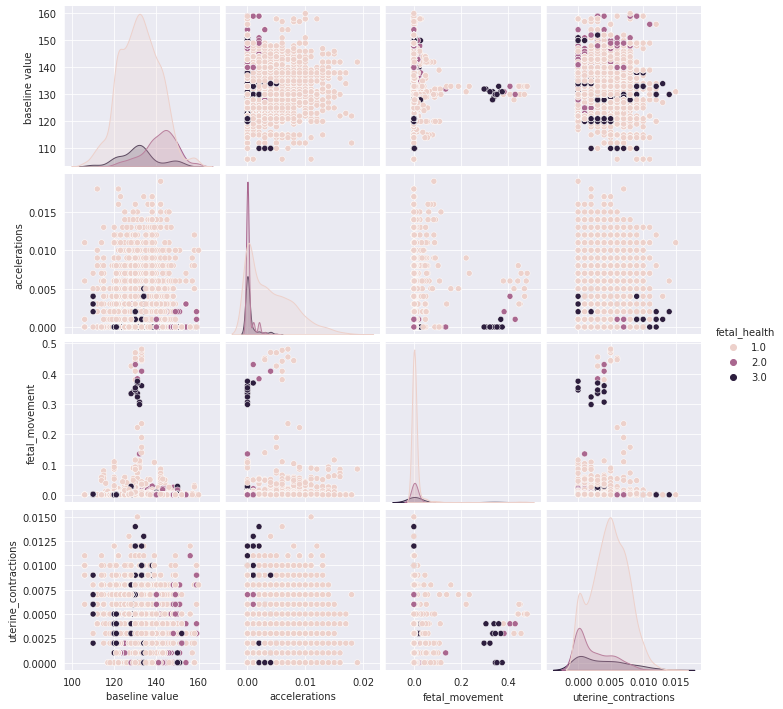

In [5]:
image = Image.open(f'{DIR_EDA_IMAGES}/pairplot_non_grouped.png')
image

Analizando los boxplots de las diferentes variables, tomamos aquellas cuyas distribuciones más se diferencian. 

Acá podemos diferenciar dos casos: 
1. Aquellos donde la diferencia es da en las medidas de tendencia central como la mediana y la mediana (por ejemplo para la variable `abnormal short term variability` ).
2. Aquellos donde se diferencian por sus rangos de ocurrencia (por ejemplo la variable `percentage of time with abnormal long term variability` ).

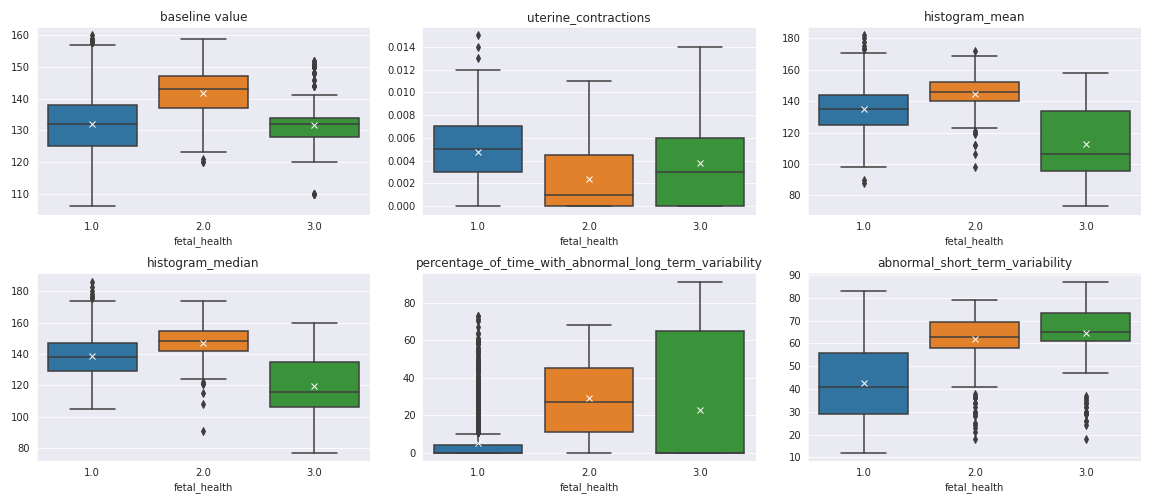

In [12]:
image = Image.open(f'{DIR_EDA_IMAGES}/boxplots.png')
image